# Problem 1

## 1

<!-- ![imgs](./imgs/1.jpeg) -->
<img src="./imgs/1.jpeg" alt="drawing" width="400"/>

Not linear separable.

## 2

<img src="./imgs/2.jpeg" alt="drawing" width="400"/>

z = x1 * x2, left part is class 0 z, right part is class 1 z.

## 3

<img src="./imgs/3.jpeg" alt="drawing" width="400"/>

<img src="./imgs/4.jpeg" alt="drawing" width="400"/>

The decision boundary in z space, and the decision boundary in (x1, x2) space.

## 4

For solving Nonlinear separable tasks, nonlinear transformations can map the tasks into linear separable space.

More specifically, the last layer of Neural Networks usually is linear layers, which means the previous nonlinear layers map the task into a linear separable case.

# Problem 2

## 1 

\begin{equation}
	\text { bias }=\mathbb{E}[g(x)]-f(x)
\end{equation}

\begin{equation}
\text { variance }=\mathbb{E}\left[(g(x)-\mathbb{E}[g(x)])^{2}\right]
\end{equation}


\begin{align}
    MSE &= \frac{1}{t} \sum_{i=1}^{t}\left(f\left(x_{i}\right)+\epsilon-g\left(x_{i}\right)\right)^{2} 
\end{align}

\begin{align}
\mathbb{E}[MSE] 
&= \mathbb{E}\left[(f(x) + \epsilon - g(x))^2\right] \\
&= \mathbb{E}\left[(y(x) - g(x))^2\right] \\
&= \mathbb{E}\left[\left(g\left(x\right)-y(x)\right)^{2}\right] \\
&= \mathbb{E}\left[g\left(x\right)^{2}-2 g\left(x\right) y(x)+y(x)^{2}\right] \\
=& \mathbb{E}\left[g\left(x\right)^{2}\right]-2 \mathbb{E}\left[g\left(x\right) y(x)\right]+\mathbb{E}\left[y(x)^{2}\right] \\
=& \mathbb{E}\left[\left(g\left(x\right)-\mathbb{E}\left[g\left(x\right)\right]\right)^{2}\right]+\mathbb{E}\left[g\left(x\right)\right]^{2} - 2\mathbb{E}\left[g\left(x\right)\right] f\left(x\right) +\mathbb{E}\left[\left(y-f\left(x\right)\right)^{2}\right]+f\left(x\right)^{2} \\
&= \mathbb{E}\left[\left(g\left(x\right)-\mathbb{E}\left[g\left(x\right)\right]\right)^{2}\right] +\left(\mathbb{E}\left[g\left(x\right)\right]^{2}-2 \mathbb{E}\left[g\left(x\right)\right] f\left(x\right)+f\left(x\right)^{2}\right)+\mathbb{E}\left[\left(y-f\left(x\right)\right)^{2}\right]\\
&=\mathbb{E}\left[\left(g\left(x\right)-\mathbb{E}\left[g\left(x\right)\right]\right)^{2}\right]+\left(\mathbb{E}\left[g\left(x\right)\right]-f\left(x\right)\right)^{2}+\mathbb{E}\left[\left(y-f\left(x\right)\right)^{2}\right] \\
&=\textbf{variance of the estimator}+ \textbf{squared bias of the estimator} + \textbf{observation noise variance} \\
&=\textbf{variance} + \textbf{bias}^2 +\textbf{noise}
\end{align}

## 2

\begin{equation}
y(x)=x+\sin (1.5 x)+\mathcal{N}(0,0.3)
\end{equation}

\begin{equation}
f(x)=x+\sin (1.5 x) \text{, } \epsilon=\mathcal{N}(0,0.3)
\end{equation}

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [391]:
mu, sigma = 0, math.sqrt(0.3) # mean and standard deviation
eps_list = np.random.normal(mu, sigma, 20)

In [416]:
def f_with_noise(x):
    return x + np.sin(x) +  np.random.normal(mu, sigma)

def f(x):
    return x + np.sin(x)

In [393]:
f_with_noise(0)

-0.06414459197528541

In [394]:
y_list = []
for i in range(20):
    y = i + math.sin(i) + eps_list[i]
    y_list.append(y)

In [395]:
x_list = [i for i in range(20)]

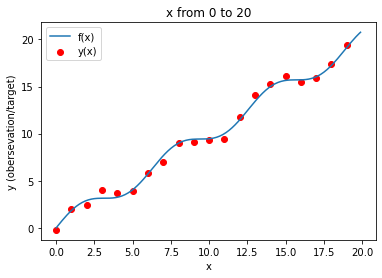

In [396]:
x_range = np.arange(0, 20, 0.1)

f_x_list = []
for x in x_range:
    f_t = x + math.sin(x)
    f_x_list.append(f_t)

    
plt.xlabel('x')
plt.ylabel('y (obersevation/target)')
    
line_f, = plt.plot(x_range, f_x_list)

line_y = plt.scatter(x_list, y_list, color="r")
plt.legend(handles=[line_f,line_y],labels=['f(x)','y(x)'],loc='best')
plt.title("x from 0 to 20")
plt.show()

## 3

\begin{equation}
g_{n}(x)=\beta_{0}+\beta_{1} x+\beta_{2} x^{2}+\ldots . .+\beta_{n} x^{n}
\end{equation}

\begin{equation}
y(x), f(x), g_{1}(x), g_{3}(x), g_{10}(x)
\end{equation}

### g1

In [397]:
d = 1
z = np.polyfit(x_list, y_list, d)
print(z)
g1 = np.poly1d(z)

[0.98476288 0.18048842]


### g3

In [398]:
d = 3
z = np.polyfit(x_list, y_list, d)
print(z)
g3 = np.poly1d(z)

[-0.00081138  0.02519801  0.77408155  0.53455273]


### g10

In [399]:
d = 10
z = np.polyfit(x_list, y_list, d)
print(z)
g10 = np.poly1d(z)

[-1.08126683e-08  7.46254762e-07 -1.77390667e-05  9.73045640e-05
  2.97403478e-03 -6.16662842e-02  4.92541868e-01 -1.83749078e+00
  2.71750204e+00  5.15910836e-01 -1.76831004e-01]


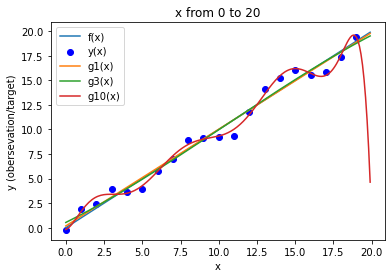

In [400]:
g1_y_list = []
g3_y_list = []
g10_y_list = []
f_x_list = []

x_range = np.arange(0, 20, 0.1)

for x in x_range:
    # f_t = x + math.sin(x)
    f_x_list.append(x)
    g1_y_list.append(g1(x))
    g3_y_list.append(g3(x))
    g10_y_list.append(g10(x))


plt.xlabel('x')
plt.ylabel('y (obersevation/target)')
    
line_f, = plt.plot(x_range, f_x_list)
line_g1, = plt.plot(x_range, g1_y_list)
line_g3, = plt.plot(x_range, g3_y_list)
line_g10, = plt.plot(x_range, g10_y_list)

line_y = plt.scatter(x_list, y_list, color="b")
plt.legend(handles=[line_f,line_y, line_g1,line_g3, line_g10],labels=['f(x)','y(x)', "g1(x)", "g3(x)", "g10(x)"],loc='best')
plt.title("x from 0 to 20")
plt.show()

Once we have the function, we can plot the prediction line smoothly. Thus we have g1, g3, g10.
We can decompose f(x) into two parts, the increasing trend, and the periodic trend.
Comparing them to f(x), the targe line, we can overserve that g1 only learned the incereasing trend, which is underfitting, and g10 learned both, but slightly overfitting. g3 learned mostly the incerseasing trend and some periodix trend.

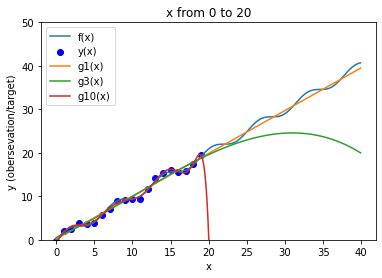

In [401]:
g1_y_list = []
g3_y_list = []
g10_y_list = []
f_x_list =[]
x_range = np.arange(0, 40, 0.1)
for x in x_range:
    f_t = x + math.sin(x)
    f_x_list.append(f_t)
    g1_y_list.append(g1(x))
    g3_y_list.append(g3(x))
    g10_y_list.append(g10(x))


plt.xlabel('x')
plt.ylabel('y (obersevation/target)')


# plt.xlim((-1,2))
plt.ylim((0,50))
    
line_f, = plt.plot(x_range, f_x_list)
line_g1, = plt.plot(x_range, g1_y_list)
line_g3, = plt.plot(x_range, g3_y_list)
line_g10, = plt.plot(x_range, g10_y_list)

line_y = plt.scatter(x_list, y_list, color="b")
plt.legend(handles=[line_f,line_y, line_g1, line_g3, line_g10],labels=['f(x)','y(x)', "g1(x)", "g3(x)", "g10(x)"],loc='best')
plt.title("x from 0 to 20")
plt.show()

### Extrapolation
Remember to use the **same range** for training and testing. But it is hard to say that how g3 learned. If we oberver the extrapolation setting, g3 is overfitting.

**Summary**: If we overserve the **same rigion/range of x**, g1 is underfitting and g10 is overfitting. If we overserve the extrapolation, g3 and g10 are both overfitting.

## 4

Generate 100 datasets (each of size 50) by randomly sampling from y. Partition each dataset into training and test set (80/20 split). Next fit the estimators of varying complexity, i.e., g 1 , g 2 , ....g 15 using the training set for each dataset. Then calculate and display the squared bias, variance, and error on testing set for each of the estimators showing the tradeoff between bias and variance with model complexity. Can you identify the best model ? (10)

#### Training Dataset

In [541]:
# (b - a) * random_sample() + a
low = 0
high = 20
# train_X_list = []
train_Y_list = []

random_list = np.random.random_sample((40,))
train_X = (high - low) * random_list + low
train_X.sort()

for i in range(100):
    train_Y = [f_with_noise(x) for x in train_X]
    train_X_list.append(train_X)
    train_Y_list.append(train_Y)

#### Test Dataset

In [542]:
# (b - a) * random_sample() + a
low = 0
high = 20

test_Y_list = []

random_list = np.random.random_sample((10,))
test_X = (high - low) * random_list + low
test_X.sort()

for i in range(100):
    test_Y = [f_with_noise(x) for x in test_X]
    test_Y_list.append(test_Y)

### Training

In [543]:
def error_function(pred, actual):
    return (pred - actual) ** 2

In [581]:
from collections import defaultdict

n_datasets = 100
model_poly_degrees = range(1, 16)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

model_list = defaultdict(list)


for dataset_idx in range(n_datasets):

    # set current training dataset
    cur_train_X = train_X
    cur_train_Y = train_Y_list[dataset_idx]
    cur_test_Y = test_Y_list[dataset_idx]
    
    for degree in model_poly_degrees:
        # Train model
        cur_theta_hat = np.polyfit(cur_train_X, cur_train_Y, degree)

        # Make predictions on train set
        cur_pred_train = np.polyval(cur_theta_hat, cur_train_X)
        
        model_list[degree] = cur_theta_hat
        pred_train[degree].append(cur_pred_train)

        # Test predictions
        cur_pred_test = np.polyval(cur_theta_hat, test_X)
        pred_test[degree].append(cur_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(cur_pred_train, cur_train_Y)))
        test_errors[degree].append(np.mean(error_function(cur_pred_test, cur_test_Y)))

Then calculate and display the squared bias, variance, and error on testing set for each of the estimators showing the tradeoff between bias and variance with model complexity.

In [582]:
def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(test_X))** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

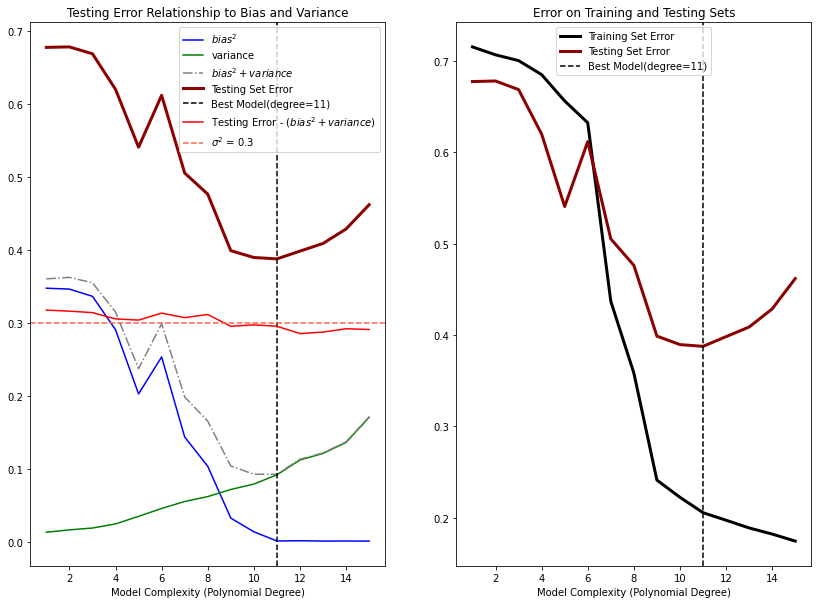

In [583]:
best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]


# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(sigma **2, color='tomato', linestyle='--', label=f'$\sigma^2$ = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
# plt.ylim([0, 1]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
# plt.ylim([0, 1]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')

In [568]:
ori_var = variance
ori_bias = bias_squared
ori_test_error = complexity_test_error

In [570]:
ori_var[9], ori_bias[9], ori_test_error[9]

(0.07885904247460922, 0.013441490496690734, 0.3894044030798497)

In [551]:
complexity_test_error

[0.6774284094553173,
 0.6780663393963229,
 0.6686462644191397,
 0.6199503569989213,
 0.5406108596101128,
 0.611693782976568,
 0.5051938270475145,
 0.4762225349404179,
 0.3987374975046918,
 0.3894044030798497,
 0.38751172472942935,
 0.39814433963847584,
 0.40867941122780566,
 0.4285175227195287]

In [449]:
best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]

In [450]:
best_model_degree

9

The best model degree is 9

## 5

One way to increase model bias is by using regularization. Lets take the order 10 polynomial and apply L2 regularization. Compare the bias, variance, and MSE of the regularized model with the unregularized order 10 polynomial model ? Does the regularized model have a higher or lower bias ? What about MSE ? Explain.

In [514]:
model_degree = 10

In [515]:
from polyfit import PolynomRegressor, Constraints
polyestimator = PolynomRegressor(deg=10)
# monotone_constraint = Constraints(monotonicity='inc')
train_features = np.expand_dims(train_X, axis=1)
train_Y = train_Y_list[0]
polyestimator.fit(train_features, train_Y, loss = 'l2')

test_features = np.expand_dims(test_X, axis=1)
pred_test = polyestimator.predict(test_features)

In [478]:
polyestimator.score(train_features, train_Y)

0.989117095817801

In [479]:
polyestimator.score(test_features, test_Y_list[0])

0.9812323942896993

In [468]:
from polyfit import PolynomRegressor, Constraints
polyestimator = PolynomRegressor(deg=10, regularization = "l2", lam = 1)
# monotone_constraint = Constraints(monotonicity='inc')
train_features = np.expand_dims(train_X, axis=1)
train_Y = train_Y_list[0]
polyestimator.fit(train_features, train_Y, loss = 'l2')

test_features = np.expand_dims(test_X, axis=1)
pred_test = polyestimator.predict(test_features)

In [469]:
polyestimator.score(train_features, train_Y)

0.6799995899096466

In [470]:
polyestimator.score(test_features, test_Y_list[0])

0.5611800188382627

In [480]:
test_error

19.378961093811622

In [481]:
test_bias_squared = calculate_estimator_bias_squared(pred_test)

In [482]:
test_variance = calculate_estimator_variance(pred_test)

In [483]:
test_bias_squared, test_variance

(22.545043483593382, 21.853903906527687)

### Regularized Ployfit

In [577]:
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

n_datasets = 100
model_poly_degrees = range(1, 15)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

model_list = defaultdict(list)


for dataset_idx in range(n_datasets):

    # set current training dataset
    cur_train_X = train_X.reshape(-1, 1)
    cur_test_X = test_X.reshape(-1, 1)
    
    cur_train_Y = train_Y_list[dataset_idx]
    cur_test_Y = test_Y_list[dataset_idx]
    
    for degree in model_poly_degrees:
        # Train model
        
        ridge_reg = Ridge(alpha=10.0)
        polynomial_features= PolynomialFeatures(degree=10)
        train_X_poly = polynomial_features.fit_transform(cur_train_X)
        ridge_reg.fit(train_X_poly, cur_train_Y)
        
#         # Make predictions on train set
        cur_pred_train = ridge_reg.predict(train_X_poly)
        
        model_list[degree] = cur_theta_hat
        pred_train[degree].append(cur_pred_train)
        
        polynomial_features= PolynomialFeatures(degree=10)
        test_X_poly = polynomial_features.fit_transform(cur_test_X)
        cur_pred_test = ridge_reg.predict(test_X_poly)

        # Test predictions
        cur_pred_test = np.polyval(cur_theta_hat, test_X)
        pred_test[degree].append(cur_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(cur_pred_train, cur_train_Y)))
        test_errors[degree].append(np.mean(error_function(cur_pred_test, cur_test_Y)))

In [578]:
complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

In [579]:
variance[9], bias_squared[9],complexity_test_error[9]

(4.652898834219833e-28, 0.06168680793993202, 0.35245738794195824)

In [580]:
ori_var[9], ori_bias[9], ori_test_error[9]

(0.07885904247460922, 0.013441490496690734, 0.3894044030798497)

### Conclusion

- The original MSE is 0.3894, and regularized MSE is 0.3525, MSE is lower in the regularized model.
- The original Squared Bias is 0.0134, the regularized Squared Bias is 0.0616, the Bias is higher in the regularized model.
- The original variance is almost 0.0788, while the regularized variance is almost 0, the Prediction Variance is lower in the regularized model.

# Porblem 3

number of features, number of instances, number of classes, number of numerical features, number of categorical features.

## 3.1

### Package Import

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### [Wine](https://www.openml.org/d/187)

In [180]:
pd.options.plotting.backend = 'plotly'

X,y = fetch_openml("wine", version=1, as_frame=True, return_X_y=True)
data = pd.concat([X,y], axis=1)
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [181]:
data["class"]

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: category
Categories (3, object): ['1', '2', '3']

In [182]:
X.shape

(178, 13)

#### Feature Suumary
We count the class as one feature of of the dataset

number of features = 14  
number of classes = 3  
number of numerical features = 13  
number of categorical features = 1  
number of instances = 178   

### [Titanic](https://www.openml.org/d/40945)

In [183]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

In [184]:
X

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


In [185]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: category
Categories (2, object): ['0', '1']

#### Feature Summary

The original dataset provide 14 features.

Follow the official tutorial, we select the effective features as below. There are total 8 effective features.

In [588]:
categorical_columns = ["pclass", "sex", "embarked"]
numerical_columns = ["age", "sibsp", "parch", "fare"]
feature_colums = categorical_columns + numerical_columns 
target_colums = ["survived"]

number of features = 14 (number of effective features = 8)  
number of classes = 2   
number of numerical features = 4  
number of categorical features = 4  
number of instances = 1309  

## 3.2

### Wine

#### Dataset Split

In [187]:
pd.options.plotting.backend = 'plotly'

X,y = fetch_openml("wine", version=1, as_frame=True, return_X_y=True)
data = pd.concat([X,y], axis=1)
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [188]:
full_train_data, test_data = train_test_split(data, train_size=int(len(data) * 0.8))
test_X = test_data[X.columns]
test_Y = test_data["class"]

#### Wine Random Forst

In [196]:
data_set_ratio = [i/100 for i in range(10, 110, 10)]

In [197]:
time_list = []
acc_list = []
for ratio in data_set_ratio:
    train_data, _ = train_test_split(data, train_size=int(len(full_train_data) * ratio))
    train_X = train_data[X.columns]
    train_Y = train_data["class"]
    begin_time = time.time()
    clf = RandomForestClassifier(random_state=0)
    clf.fit(train_X, train_Y)
    test_pred = clf.predict(test_X)
    test_acc = accuracy_score(test_pred, test_Y)
    end_time = time.time()
    print(f"{ratio * 100}% data set accuracy: {test_acc}")
    print(f"{ratio * 100}% data set time: {end_time - begin_time}")
    acc_list.append(test_acc)
    time_list.append(end_time - begin_time)

10.0% data set accuracy: 0.8888888888888888
10.0% data set time: 0.06912112236022949
20.0% data set accuracy: 0.9444444444444444
20.0% data set time: 0.06709003448486328
30.0% data set accuracy: 0.9722222222222222
30.0% data set time: 0.0674595832824707
40.0% data set accuracy: 0.9722222222222222
40.0% data set time: 0.06770563125610352
50.0% data set accuracy: 0.9722222222222222
50.0% data set time: 0.07648634910583496
60.0% data set accuracy: 1.0
60.0% data set time: 0.0709528923034668
70.0% data set accuracy: 1.0
70.0% data set time: 0.07114195823669434
80.0% data set accuracy: 0.9722222222222222
80.0% data set time: 0.07028794288635254
90.0% data set accuracy: 1.0
90.0% data set time: 0.0775306224822998
100.0% data set accuracy: 0.9722222222222222
100.0% data set time: 0.0721902847290039


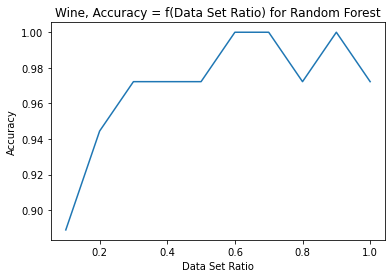

In [198]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Accuracy")
title = "Wine, Accuracy = f(Data Set Ratio) for Random Forest"
plt.title("Wine, Accuracy = f(Data Set Ratio) for Random Forest")
plt.plot(data_set_ratio, acc_list)
plt.savefig(f"./imgs/{title}")

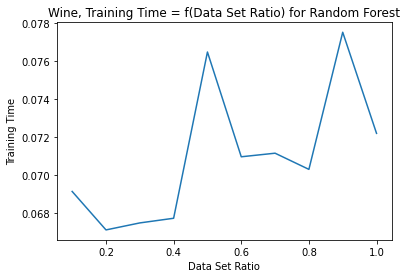

In [199]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Training Time")
title = "Wine, Training Time = f(Data Set Ratio) for Random Forest"
plt.title("Wine, Training Time = f(Data Set Ratio) for Random Forest")
plt.plot(data_set_ratio, time_list)
plt.savefig(f"./imgs/{title}")

#### Wine Gradient Boosting

In [200]:
time_list = []
acc_list = []
for ratio in data_set_ratio:
    train_data, _ = train_test_split(data, train_size=int(len(full_train_data) * ratio))
    train_X = train_data[X.columns]
    train_Y = train_data["class"]
    begin_time = time.time()
    clf = GradientBoostingClassifier(random_state=0)
    clf.fit(train_X, train_Y)
    test_pred = clf.predict(test_X)
    test_acc = accuracy_score(test_pred, test_Y)
    end_time = time.time()
    print(f"{ratio * 100}% data set accuracy: {test_acc}")
    print(f"{ratio * 100}% data set time: {end_time - begin_time}")
    acc_list.append(test_acc)
    time_list.append(end_time - begin_time)

10.0% data set accuracy: 0.9444444444444444
10.0% data set time: 0.07392120361328125
20.0% data set accuracy: 0.8888888888888888
20.0% data set time: 0.08250975608825684
30.0% data set accuracy: 0.75
30.0% data set time: 0.09133410453796387
40.0% data set accuracy: 0.8888888888888888
40.0% data set time: 0.1044931411743164
50.0% data set accuracy: 0.9722222222222222
50.0% data set time: 0.12393045425415039
60.0% data set accuracy: 0.9444444444444444
60.0% data set time: 0.12625622749328613
70.0% data set accuracy: 0.9722222222222222
70.0% data set time: 0.13627004623413086
80.0% data set accuracy: 0.9166666666666666
80.0% data set time: 0.13998985290527344
90.0% data set accuracy: 0.9166666666666666
90.0% data set time: 0.15979433059692383
100.0% data set accuracy: 1.0
100.0% data set time: 0.1690232753753662


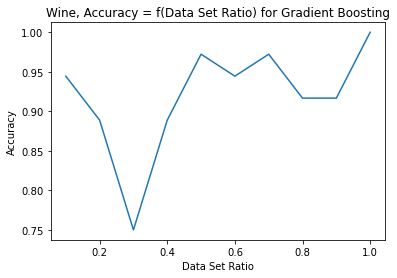

In [201]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Accuracy")
title = "Wine, Accuracy = f(Data Set Ratio) for Gradient Boosting"
plt.title("Wine, Accuracy = f(Data Set Ratio) for Gradient Boosting")
plt.plot(data_set_ratio, acc_list)
plt.savefig(f"./imgs/{title}")

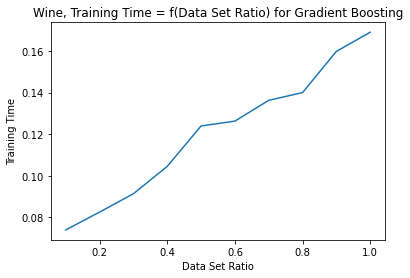

In [205]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Training Time")
title = "Wine, Training Time = f(Data Set Ratio) for Gradient Boosting"
plt.title("Wine, Training Time = f(Data Set Ratio) for Gradient Boosting")
plt.plot(data_set_ratio, time_list)
plt.savefig(f"./imgs/{title}")

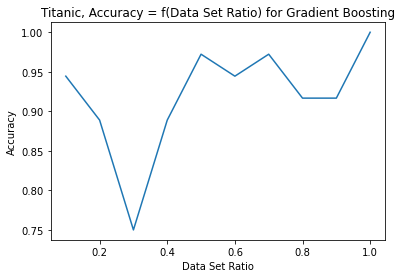

In [207]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Accuracy")
title = "Titanic, Accuracy = f(Data Set Ratio) for Gradient Boosting"
plt.title("Titanic, Accuracy = f(Data Set Ratio) for Gradient Boosting")
plt.plot(data_set_ratio, acc_list)
plt.savefig(f"./imgs/{title}")

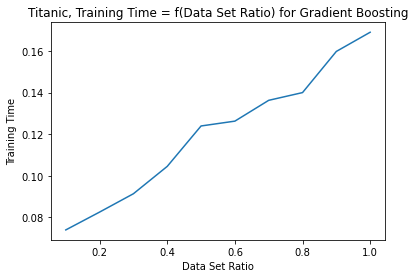

In [208]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Training Time")
title = "Titanic, Training Time = f(Data Set Ratio) for Gradient Boosting"
plt.title("Titanic, Training Time = f(Data Set Ratio) for Gradient Boosting")
plt.plot(data_set_ratio, time_list)
plt.savefig(f"./imgs/{title}")

### Titanic

#### Dataset Split

In [584]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
data = pd.concat([X, y], axis=1)

In [585]:
full_train_data, test_data = train_test_split(data, train_size=int(len(data) * 0.8))
test_X = test_data[X.columns]
test_Y = test_data["survived"]

In [586]:
categorical_columns = ["pclass", "sex", "embarked"]
numerical_columns = ["age", "sibsp", "parch", "fare"]
feature_colums = categorical_columns + numerical_columns 

X = X[categorical_columns + numerical_columns]

data = pd.concat([X, y], axis=1)
full_train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
numerical_pipe = Pipeline([("imputer", SimpleImputer(strategy="mean"))])

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ]
)

#### Titanic Random Forst

In [131]:
data_set_ratio = [i/100 for i in range(10, 110, 10)]

In [132]:
time_list = []
acc_list = []
for ratio in data_set_ratio:
    if ratio == 1:
        train_data = full_train_data
    else:
        train_data, _ = train_test_split(full_train_data, train_size=ratio)
    train_X = train_data[X.columns]
    train_Y = train_data["survived"]
    begin_time = time.time()
    clf = Pipeline(
        [
            ("preprocess", preprocessing),
            ("classifier", RandomForestClassifier(random_state=0)),
        ]
    )
    clf.fit(train_X, train_Y)
    test_pred = clf.predict(test_X)
    test_acc = accuracy_score(test_pred, test_Y)
    end_time = time.time()
    print(f"{ratio * 100}% data set accuracy: {test_acc}")
    print(f"{ratio * 100}% data set time: {end_time - begin_time}")
    acc_list.append(test_acc)
    time_list.append(end_time - begin_time)

10.0% data set accuracy: 0.7748091603053435
10.0% data set time: 0.07650876045227051
20.0% data set accuracy: 0.851145038167939
20.0% data set time: 0.07842731475830078
30.0% data set accuracy: 0.8053435114503816
30.0% data set time: 0.0879662036895752
40.0% data set accuracy: 0.8778625954198473
40.0% data set time: 0.09031867980957031
50.0% data set accuracy: 0.8664122137404581
50.0% data set time: 0.09135270118713379
60.0% data set accuracy: 0.8778625954198473
60.0% data set time: 0.09260821342468262
70.0% data set accuracy: 0.9312977099236641
70.0% data set time: 0.09542965888977051
80.0% data set accuracy: 0.9198473282442748
80.0% data set time: 0.09736514091491699
90.0% data set accuracy: 0.9465648854961832
90.0% data set time: 0.10120892524719238
100.0% data set accuracy: 0.9618320610687023
100.0% data set time: 0.10472583770751953


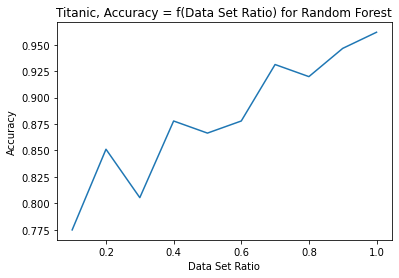

In [133]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Accuracy")
title = "Titanic, Accuracy = f(Data Set Ratio) for Random Forest"
plt.title("Titanic, Accuracy = f(Data Set Ratio) for Random Forest")
plt.plot(data_set_ratio, acc_list)
plt.savefig(f"./imgs/{title}")

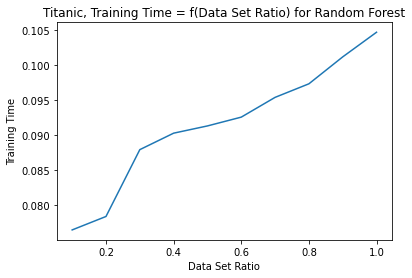

In [134]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Training Time")
title = "Titanic, Training Time = f(Data Set Ratio) for Random Forest"
plt.title("Titanic, Training Time = f(Data Set Ratio) for Random Forest")
plt.plot(data_set_ratio, time_list)
plt.savefig(f"./imgs/{title}")

#### Titanic Gradient Boosting

In [135]:
time_list = []
acc_list = []
for ratio in data_set_ratio:
    if ratio == 1:
        train_data = full_train_data
    else:
        train_data, _ = train_test_split(full_train_data, train_size=ratio)
    train_X = train_data[X.columns]
    train_Y = train_data["survived"]
    begin_time = time.time()
    clf = Pipeline(
        [
            ("preprocess", preprocessing),
            ("classifier", GradientBoostingClassifier(random_state=0)),
        ]
    )
    clf.fit(train_X, train_Y)
    test_pred = clf.predict(test_X)
    test_acc = accuracy_score(test_pred, test_Y)
    end_time = time.time()
    print(f"{ratio * 100}% data set accuracy: {test_acc}")
    print(f"{ratio * 100}% data set time: {end_time - begin_time}")
    acc_list.append(test_acc)
    time_list.append(end_time - begin_time)

10.0% data set accuracy: 0.7175572519083969
10.0% data set time: 0.03606605529785156
20.0% data set accuracy: 0.8015267175572519
20.0% data set time: 0.03931021690368652
30.0% data set accuracy: 0.8206106870229007
30.0% data set time: 0.043671369552612305
40.0% data set accuracy: 0.8473282442748091
40.0% data set time: 0.047707319259643555
50.0% data set accuracy: 0.8625954198473282
50.0% data set time: 0.050878286361694336
60.0% data set accuracy: 0.8587786259541985
60.0% data set time: 0.05563688278198242
70.0% data set accuracy: 0.8778625954198473
70.0% data set time: 0.06013321876525879
80.0% data set accuracy: 0.8549618320610687
80.0% data set time: 0.06236743927001953
90.0% data set accuracy: 0.8549618320610687
90.0% data set time: 0.06618213653564453
100.0% data set accuracy: 0.8625954198473282
100.0% data set time: 0.07008790969848633


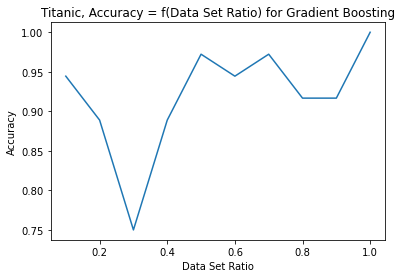

In [207]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Accuracy")
title = "Titanic, Accuracy = f(Data Set Ratio) for Gradient Boosting"
plt.title("Titanic, Accuracy = f(Data Set Ratio) for Gradient Boosting")
plt.plot(data_set_ratio, acc_list)
plt.savefig(f"./imgs/{title}")

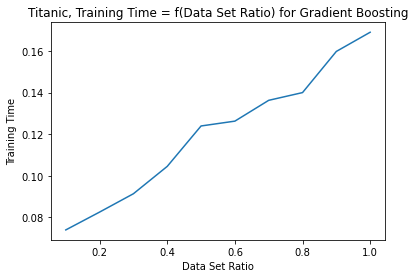

In [208]:
plt.xlabel("Data Set Ratio")
plt.ylabel("Training Time")
title = "Titanic, Training Time = f(Data Set Ratio) for Gradient Boosting"
plt.title("Titanic, Training Time = f(Data Set Ratio) for Gradient Boosting")
plt.plot(data_set_ratio, time_list)
plt.savefig(f"./imgs/{title}")

## 3.3

Study the scaling of training time and accuracy of classifiers with training data size using the two figures generated in part 2 of the question. Compare the performance of classifiers in terms of training time and accuracy and write 3 main observations. Which gives better accuracy ? Which has shorter training time ? (5)

### Hardware Configuration

For fair evaluation, I give the test environment as below.

### Wine Observation

In [203]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(-0.5, 431.5, 287.5, -0.5)

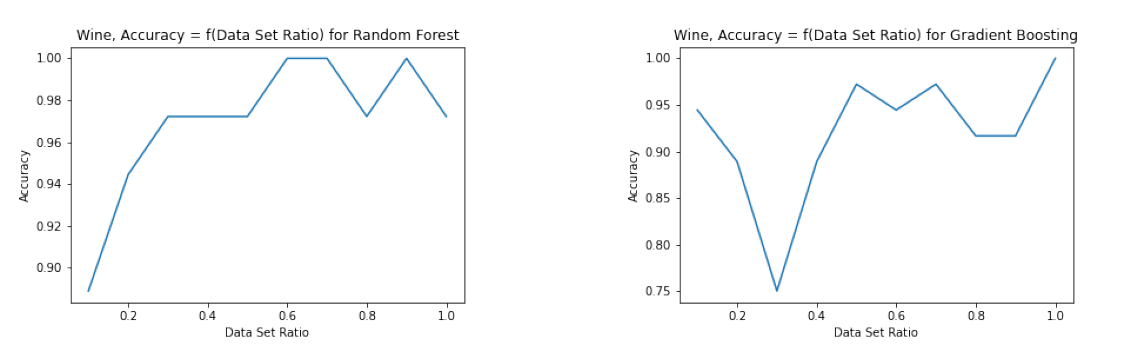

In [204]:
img1 = mpimg.imread("./imgs/Wine, Accuracy = f(Data Set Ratio) for Random Forest.png")
# imgplot = plt.imshow(img1)
img2 = mpimg.imread("./imgs/Wine, Accuracy = f(Data Set Ratio) for Gradient Boosting.png")
# imgplot = plt.imshow(img2)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis('off') 
plt.subplot(1,2,2)
plt.imshow(img2)
plt.axis('off') 

The wine task is not that hard, when the training set ratio is greater than the 60%, the accuracy can achieve 100%. There are more randomness in Gradient Boosting if we use the default training configuration, with hyperparameter tuning.

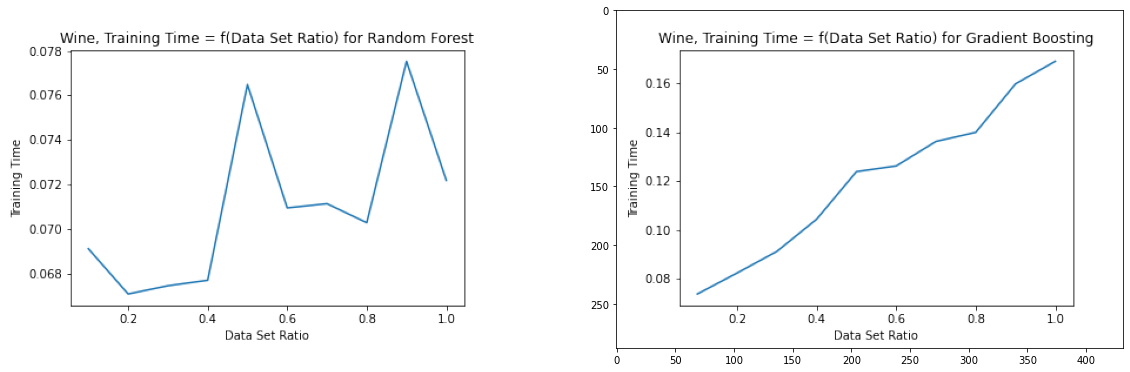

In [206]:
img1 = mpimg.imread("./imgs/Wine, Training Time = f(Data Set Ratio) for Random Forest.png")
# imgplot = plt.imshow(img1)
img2 = mpimg.imread("./imgs/Wine, Training Time = f(Data Set Ratio) for Gradient Boosting.png")


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img2)

# plt.show()

The wine dataset is quite small and toy-like, when we do the training, the training is very fast and the time measure is very noisy. But we can notice the training time is positive correlated with the dataset ratio (training dataset size). This trend is more obvious in Gradient Boosting Algorithm.

### Titanic Obervation

(-0.5, 431.5, 287.5, -0.5)

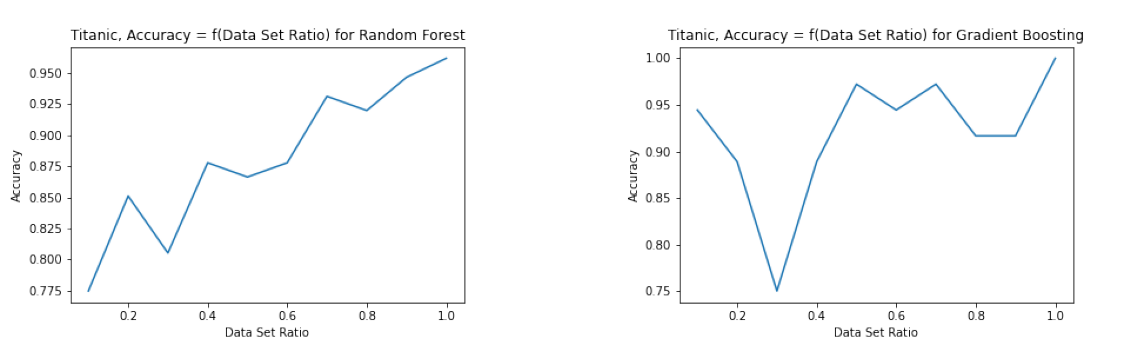

In [211]:
img1 = mpimg.imread("./imgs/Titanic, Accuracy = f(Data Set Ratio) for Random Forest.png")
# imgplot = plt.imshow(img1)
img2 = mpimg.imread("./imgs/Titanic, Accuracy = f(Data Set Ratio) for Gradient Boosting.png")
# imgplot = plt.imshow(img2)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis('off') 
plt.subplot(1,2,2)
plt.imshow(img2)
plt.axis('off') 

Similar to the Wine dataset, the random forest is more consistent performance increasing with the dataset ratio increasing. The Gradient Boosting method has the positive correlation but a little noisy.

(-0.5, 431.5, 287.5, -0.5)

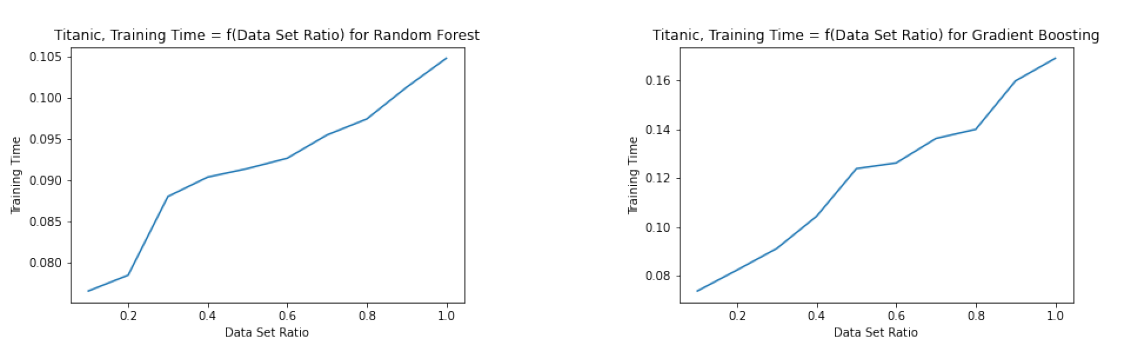

In [209]:
img1 = mpimg.imread("./imgs/Titanic, Training Time = f(Data Set Ratio) for Random Forest.png")
# imgplot = plt.imshow(img1)
img2 = mpimg.imread("./imgs/Titanic, Training Time = f(Data Set Ratio) for Gradient Boosting.png")
# imgplot = plt.imshow(img2)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis('off') 
plt.subplot(1,2,2)
plt.imshow(img2)
plt.axis('off') 

The Titanic dataset size is larger than the Wine dataset. The training time is obviously positive correlated with the dataset size.

### Observation Summary:

- Generally, the accuracy is positive correlated with the training dataset size, this correlation stength maybe different for different learning algorithms, and the correlation is sometimes noisy to observe in small toy dataset.
- The training time is positive correlated with the dataset ratio, from the observation, the gradient boosting training time is more consistent with this trend. (Gradient Boosting training time is more sensitive to the training dataset size.)
- The random seed may affect the toy dataset learning, which make the obervation noisy. For more consistent observations, we may need a larger dataset and more complex model

### Accuracy and Training Time

Random Forest is easier to be implemented parallelly, and faster to train. The training of random forest is faster.

In the expirment, gradient boosting have better accuracy: Gradient Boosting has less bias but may have higher variance, so the training accuracy upper bound may be higher than random forest (for the i.i.d data). 

# Problem 4

## 4.1

(a)**Does true negative matter for both ROC and PR curve?**

**ROC Curve**
ROC can be seen as the curve of True-Positive Rate vs False-Positive Rate(TPR-FPR). 

FPR = FP/(FP+TN), so TN will affect the ROC curve.

TPR= TP /(TP+FN)


**PR Curve**
PR Curve is related to Recall and Precision. 

Recall =TP/(TP+FN)

Precision = TP/(TP + FP)

TN will not directly affect the PR curve.

(b)**Why each point on ROC curve corresponds to a unique point on  PR curve ?**

ROC -> PR

We have, Recall = TPR

\begin{equation}
    P = TP + FN,
\end{equation}

\begin{equation}
    N = FP + TN.
\end{equation}

For a given point on ROC, TPR and FPR is given. We have the P and N accroding to the dataset (or at least they are fixed if we do not know the exact number).

Thus we can use


\begin{equation}
    TP = TPR * P
\end{equation}

\begin{equation}
    FP = FPR * N
\end{equation}


Thus we can get FN and FP, we have the whole metrix.


PR -> ROC

**Reversely, We can get the whole metric from PR Curve**, if we have the dataset label count.

TP = Recall * P

FN = P - TP

FP = ((1/Precision) - 1)*TP

TN = N - FP

## 4.2

We use the [Titanic](https://www.openml.org/d/40945) Dataset

In [101]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
data = pd.concat([X, y], axis=1)

In [102]:
categorical_columns = ["pclass", "sex", "embarked"]
numerical_columns = ["age", "sibsp", "parch", "fare"]
feature_colums = categorical_columns + numerical_columns 
# print(data)

X = X[categorical_columns + numerical_columns]

data = pd.concat([X, y], axis=1)
full_train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_X = full_train_data[feature_colums]
train_Y = full_train_data["survived"]
test_X = test_data[feature_colums]
test_Y = test_data["survived"]

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
numerical_pipe = Pipeline([("imputer", SimpleImputer(strategy="mean"))])

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ]
)

### Adaboost

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, RocCurveDisplay, PrecisionRecallDisplay

clf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", AdaBoostClassifier(n_estimators=100, random_state=0)),
    ]
)

clf.fit(train_X, train_Y)
test_pred = clf.predict(test_X)
test_acc = accuracy_score(test_pred, test_Y)

test_pred_arr_adaboost = test_pred.astype(int)
test_Y_arr = test_Y.to_numpy().astype(int)


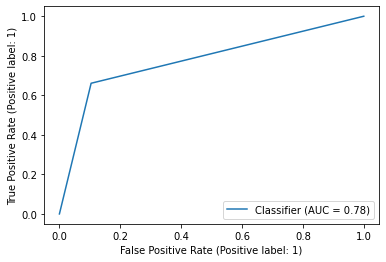

In [104]:
adaboost_roc_figure = RocCurveDisplay.from_predictions(test_Y_arr, test_pred_arr_adaboost).figure_

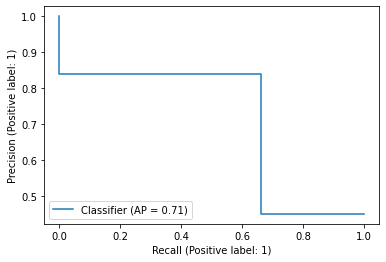

In [105]:
PrecisionRecallDisplay.from_predictions(test_Y_arr, test_pred_arr_adaboost)

### Logistic Regression

In [106]:
from sklearn.metrics import roc_curve, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
clf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", LogisticRegression(random_state=1, max_iter=10000)),
    ]
)

clf.fit(train_X, train_Y)
test_pred = clf.predict(test_X)
test_acc = accuracy_score(test_pred, test_Y)

test_pred_arr_lr = test_pred.astype(int)
test_Y_arr = test_Y.to_numpy().astype(int)

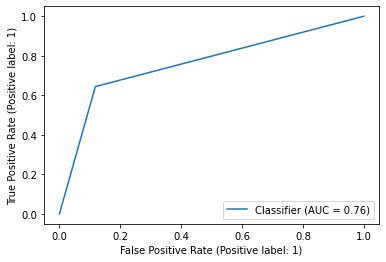

In [107]:
RocCurveDisplay.from_predictions(test_Y_arr, test_pred_arr_lr)

**Note**: This curve is a little wired from sklearn, we use matplotlib to plot again in the merged section

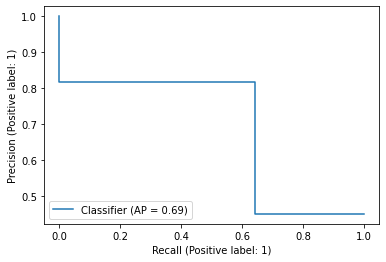

In [143]:
PrecisionRecallDisplay.from_predictions(test_Y_arr, test_pred_arr_lr)

### Merged Two Figures

#### ROC Curve

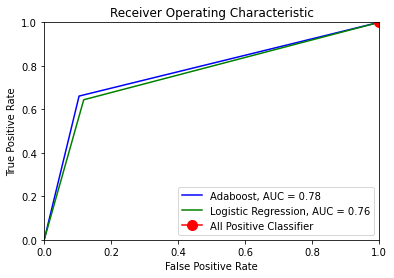

In [144]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_Y_arr, test_pred_arr_adaboost)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'Adaboost, AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(test_Y_arr, test_pred_arr_lr)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'Logistic Regression, AUC = %0.2f' % roc_auc)

plt.plot(1,1, 'r', marker="o", markersize=10, label="All Positive Classifier")


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()


#### PR Curve

In [155]:
P = sum(test_Y_arr)
N = len(test_Y_arr) - P
balance = P/(N+P)
print(balance)

0.45038167938931295


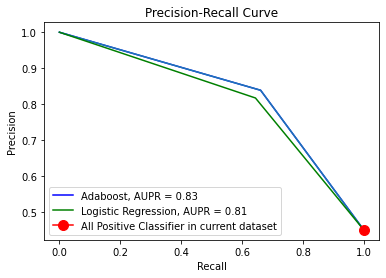

In [157]:
from sklearn.metrics import precision_recall_curve, auc


#create precision recall curve
fig, ax = plt.subplots()
precision, recall, thresholds = precision_recall_curve(test_Y_arr, test_pred_arr_adaboost)
ax.plot(recall, precision, color='b', label = 'Adaboost, AUPR = %0.2f' % auc(recall, precision))
plt.plot(recall, precision)

precision, recall, thresholds = precision_recall_curve(test_Y_arr, test_pred_arr_lr)
ax.plot(recall, precision, color='g', label = 'Logistic Regression, AUPR = %0.2f' % auc(recall, precision))
plt.plot(1, balance, 'r', marker="o", markersize=10, label="All Positive Classifier in current dataset")

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
# plt.plot("")

plt.legend()

#display plot
plt.show()


All positive classifier will have recall = 1, the precision depends on the dataset class ratio. In current dataset, the ratio is 0.4504.

## 4.3 PR Gain Curve

We use the [package](https://github.com/meeliskull/prg/blob/master/README.md)

#### PRG Curve Adaboost

0.6654114769766479


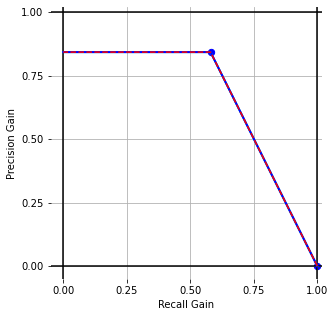

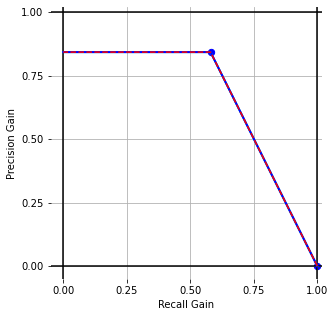

In [67]:
from prg import prg
import numpy as np
prg_curve = prg.create_prg_curve(test_Y_arr, test_pred_arr_adaboost)
auprg = prg.calc_auprg(prg_curve)
print(auprg)
prg.plot_prg(prg_curve)

#### PRG Curve Logistic Regression

0.6317808324035601


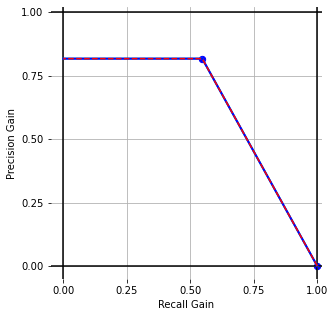

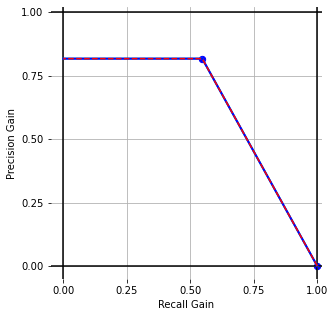

In [69]:
from prg import prg
import numpy as np
prg_curve = prg.create_prg_curve(test_Y_arr, test_pred_arr_lr)
auprg = prg.calc_auprg(prg_curve)
print(auprg)
prg.plot_prg(prg_curve)

### Summary

| MOdel               | AUROC | AUPR | AUPRG |
| ------------------- | ----- | ---- | ----- |
| Adaboost            | 0.78  | 0.83 | 0.66  |
| Logistic Regression | 0.76  | 0.81 | 0.63  |

Generally, Adaboost algorithm is better than LR in three metric

I agree, there are several advantages:
- precision and recall do not consider TN, PGR curve consider that.
- PRG curve combine the advantages of ROC and PR curve.
- PRG curve is smoother than PR Curve. (Not In our expirments, due to the simple sitting, this conclusion from the original paper.)
- PR curves can easily favour models with lower expected F1 score than others.
